In [3]:
import numpy as np
import cv2
import img2pdf 
from PIL import Image 
import os
import math
import time
from matplotlib import pyplot as plt

In [5]:
def readImg(imagename):
    img = cv2.imread(imagename, 1)
    return img
def convertToGray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def getHist(img):
    x = plt.hist(grayImg.ravel(),256,[0,256]); 
    xx = []
    for a in x[0]:
        xx.append(int(a))
    return xx
def cumHist(hist):
    for i in range(1, 255):
        m = max(hist[:255])
        hist[i] = int((hist[i]/m)*100)

    y = [0]*255
    k = 0
    x = [0]*255
    for i in range(1, 255):
        k = k + hist[i]
        y[i] = k
        x[i] = i
    return x, y
def findSlopeOffset(x, y):
    slope = 0
    offset = 0
    xmean=0.0
    ymean=0.0
    xymean=0.0
    xmeansqr=0.0
    xsqrmean=0.0;
    n = 255
    for i in range(1, 255):
        xmean = x[i] + xmean
        ymean = y[i] + ymean
        xymean = xymean + (x[i]*y[i])
        xsqrmean = xsqrmean + (x[i]*x[i])
    xmean = xmean/n;
    ymean = ymean/n;
    xymean = xymean/n;
    xmeansqr = xmean*xmean;
    xsqrmean = xsqrmean/n;
    
#     print (xmean, ymean, xymean, xmeansqr, xsqrmean)
    slope = ((xmean*ymean) - xymean)/(xmeansqr - xsqrmean);
    offset = ymean - slope*xmean;
#     print (int(slope), int(offset))
    return int(slope), int(offset)
def findCoord(x, slope, offset):
    y = (slope * x)+ offset
    return x, y
def findArea(a, b, c, d, t):
    print(abs(a-c))
    print(abs(b-d))
#     print(t)
    if abs(a-c) <= t and abs(b-d) <= t:
        return 1
    return 0
    
        

['Lenova81DE00U5IN-Back-100.jpg', 'Lenova81DE00U5IN-TopView-100.jpg', 'Lenova81DE00U5IN-SideLeft-100.jpg', 'Lenova81DE00U5IN-SideLeft-100-100.jpg', 'Lenova81DE00U5IN-TopView-100-100.jpg', 'Lenova81DE00U5IN-SideLeft.jpg', '6.jpg', 'Lenova81DE00U5IN-Back-100-100.jpg', 'Lenova81DE00U5IN-SideRight-100-100.jpg', 'Lenova81DE00U5IN-Front.jpg', 'Lenova81DE00U5IN-SideRight-100.jpg', 'Lenova81DE00U5IN-Back.jpg', 'Lenova81DE00U5IN-Front-100.jpg', 'Lenova81DE00U5IN-Front-100-100.jpg', 'Lenova81DE00U5IN-SideRight.jpg', 'Lenova81DE00U5IN-TopView.jpg']
5 -75
10 -167
-70
425
-157
833


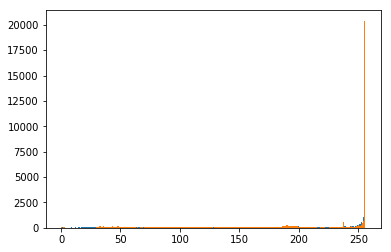

In [9]:
files = os.listdir("images/")
print(files)
path = 'duplication/'
imagename = path+'6.jpg'
firstImg = readImg(imagename)
imagename = path+'7.jpg'
secondImg = readImg(imagename)

grayImg = convertToGray(firstImg)

hist = getHist(grayImg)
x, y = cumHist(hist)
firstSlope, firstOffset = findSlopeOffset(x, y)
print (firstSlope, firstOffset)

grayImg = convertToGray(secondImg)
hist = getHist(grayImg)
x, y = cumHist(hist)
secondSlope, secondOffset = findSlopeOffset(x, y)
print (secondSlope, secondOffset)
x1, a = findCoord(1, firstSlope, firstOffset)
print(a)
x2, b = findCoord(100, firstSlope, firstOffset)
print(b)
x1, c = findCoord(1, secondSlope, secondOffset)
print(c)
x2, d = findCoord(100, secondSlope, secondOffset)
print(d)
# r = findArea(a, b, c, d, 400)
# print(r)